In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv(r'c://users/admin/Downloads/Zomato-data-.csv')

In [8]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [9]:
def Handlerate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)
    
data['rate'] = data['rate'].apply(Handlerate)
print(data.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [11]:
print(data.isnull().sum())

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


Text(0.5, 0, 'Type of restaurant')

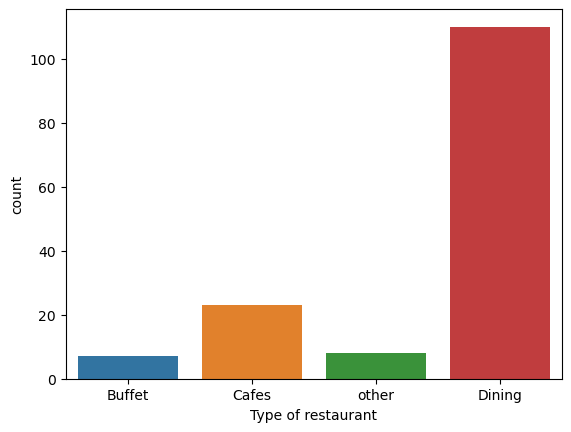

In [17]:
import warnings 
warnings.filterwarnings('ignore')
sns.countplot(x = data['listed_in(type)'])
plt.xlabel('Type of restaurant')

Text(0, 0.5, 'votes')

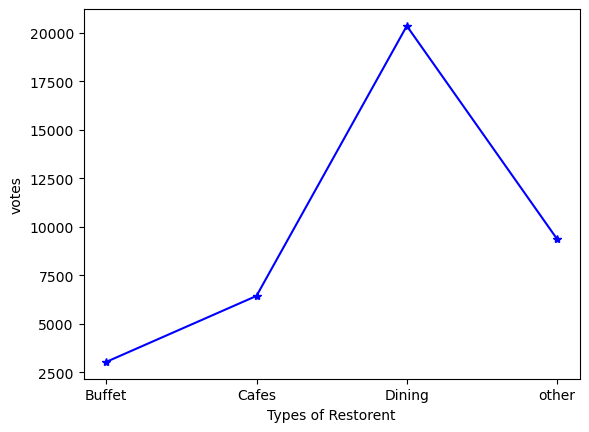

In [23]:
grp_data = data.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grp_data})
plt.plot(result, c='blue', marker='*')
plt.xlabel('Types of Restorent')
plt.ylabel('votes')

In [28]:
max_votes = data['votes'].max()
restaurant_with_max_votes = data.loc[data['votes']==max_votes,'name']
print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


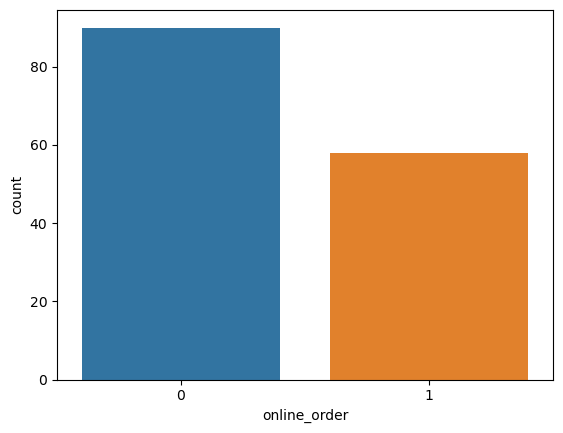

In [33]:
data['online_order'] = data['online_order'].map({'Yes': 1, 'No': 0})
sns.countplot(x='online_order', data=data)
plt.show()

<Axes: xlabel='online_order', ylabel='count'>

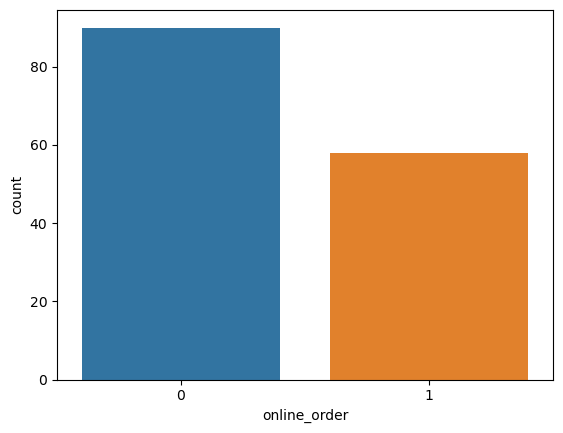

In [34]:
sns.countplot(x='online_order', data=data)

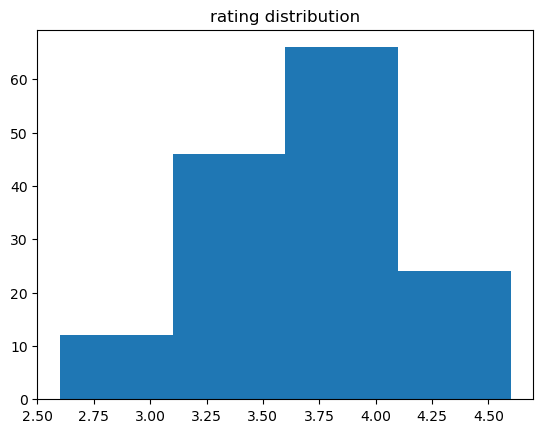

In [36]:
plt.hist(data['rate'],bins=4)
plt.title('rating distribution')
plt.show()

In [38]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

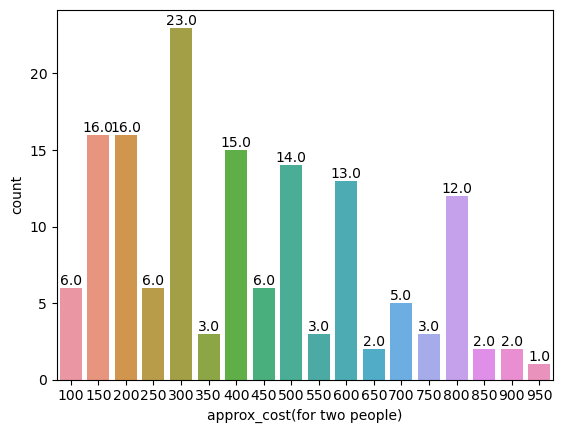

In [41]:
couple_data = data['approx_cost(for two people)']
ax = sns.countplot(x=couple_data)
for p in ax.patches:
    ax.annotate(p.get_height(),                 # the value
                (p.get_x() + p.get_width() / 2., p.get_height()), # position
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

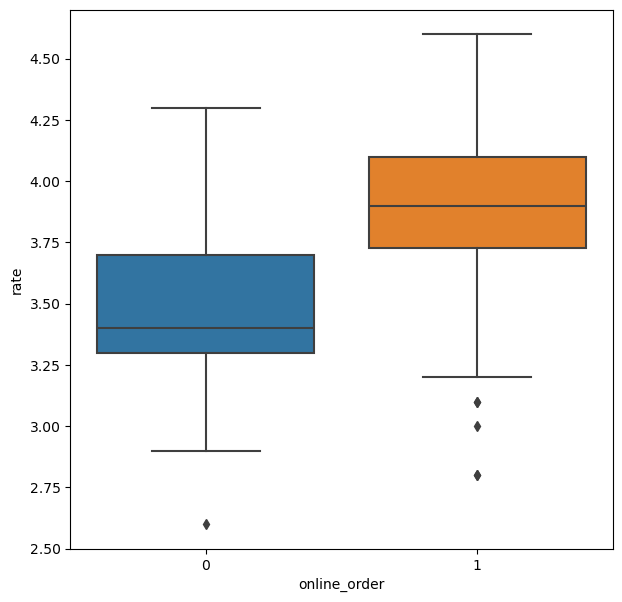

In [48]:
plt.figure(figsize=(7,7))
sns.boxplot(x='online_order',y='rate',data=data)
plt.show()

online_order      0   1
listed_in(type)        
Buffet            3   4
Cafes             8  15
Dining           77  33
other             2   6


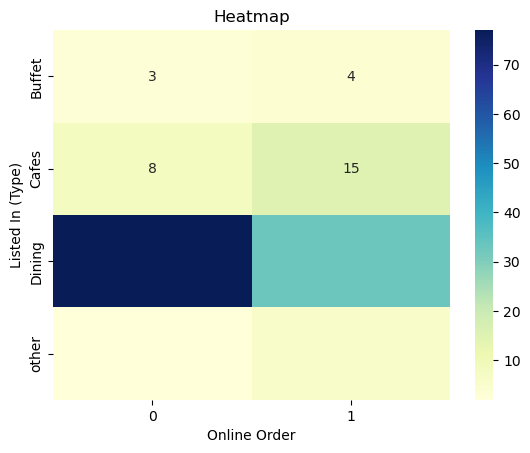

In [51]:
pivot_table = data.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
print(pivot_table)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()